In [ ]:
import pandas as pd
df= pd.read_csv('/content/MSFT (4).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9410,2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900
9411,2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700
9412,2023-07-19,361.750000,362.459991,352.440002,355.079987,355.079987,39732900
9413,2023-07-20,353.570007,357.970001,345.369995,346.869995,346.869995,33778400


In [ ]:
df_1 = df[['Date', 'Close']]
df_1

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9410,2023-07-17,345.730011
9411,2023-07-18,359.489990
9412,2023-07-19,355.079987
9413,2023-07-20,346.869995


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day= int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_obj=str_to_datetime('2000-01-12')
datetime_obj

datetime.datetime(2000, 1, 12, 0, 0)

In [ ]:
df_1['Date']= df_1['Date'].apply(str_to_datetime)
df_1['Date']

<ipython-input-28-8aef8533d1ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Date']= df_1['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9410   2023-07-17
9411   2023-07-18
9412   2023-07-19
9413   2023-07-20
9414   2023-07-21
Name: Date, Length: 9415, dtype: datetime64[ns]

In [ ]:
df_1.index = df_1.pop('Date')
df_1

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-07-17,345.730011
2023-07-18,359.489990
2023-07-19,355.079987


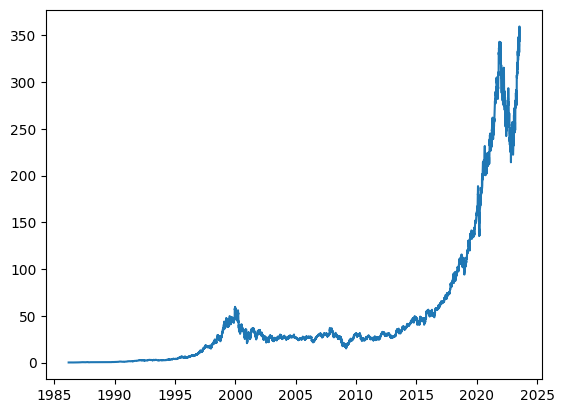

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_1.index, df_1['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=7):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df_1,
                                '2016-01-01',
                                '2023-07-21',
                                n=7)
windowed_df

,Target Date,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2016-01-01,54.830002,55.349998,55.820000,55.669998,55.950001,56.549999,56.310001,55.480000
1,2016-01-05,55.820000,55.669998,55.950001,56.549999,56.310001,55.480000,54.799999,55.049999
2,2016-01-06,55.669998,55.950001,56.549999,56.310001,55.480000,54.799999,55.049999,54.049999
3,2016-01-07,55.950001,56.549999,56.310001,55.480000,54.799999,55.049999,54.049999,52.169998
4,2016-01-08,56.549999,56.310001,55.480000,54.799999,55.049999,54.049999,52.169998,52.330002
...,...,...,...,...,...,...,...,...,...
1895,2023-07-17,341.269989,337.220001,331.829987,332.470001,337.200012,342.660004,345.239990,345.730011
1896,2023-07-18,337.220001,331.829987,332.470001,337.200012,342.660004,345.239990,345.730011,359.489990
1897,2023-07-19,331.829987,332.470001,337.200012,342.660004,345.239990,345.730011,359.489990,355.079987
1898,2023-07-20,332.470001,337.200012,342.660004,345.239990,345.730011,359.489990,355.079987,346.869995


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1900,), (1900, 7, 1), (1900,))

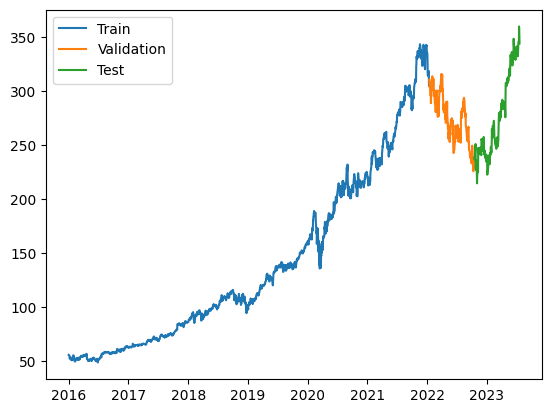

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64, return_sequences= True),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
48/48 [==============================] - 4s 26ms/step - loss: 24660.2266 - mean_absolute_error: 135.4052 - val_loss: 68201.1172 - val_mean_absolute_error: 260.2202
Epoch 2/100
48/48 [==============================] - 1s 11ms/step - loss: 16982.4395 - mean_absolute_error: 102.5124 - val_loss: 42352.0547 - val_mean_absolute_error: 204.6118
Epoch 3/100
48/48 [==============================] - 0s 10ms/step - loss: 7698.0205 - mean_absolute_error: 65.1530 - val_loss: 18874.5391 - val_mean_absolute_error: 135.6041
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 6316.0776 - mean_absolute_error: 66.5617 - val_loss: 18771.2402 - val_mean_absolute_error: 135.2227
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 6305.3618 - mean_absolute_error: 66.1254 - val_loss: 19276.5781 - val_mean_absolute_error: 137.0790
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 3640.6924 - mean_absolute_error: 37.8527 - val_loss: 53

In [ ]:
loss=history.history["loss"]
mse=history.history["mean_absolute_error"]
val_loss = history.history['val_loss']
val_mse = history.history['mean_absolute_error']
epochs = range(1, len(loss) + 1)

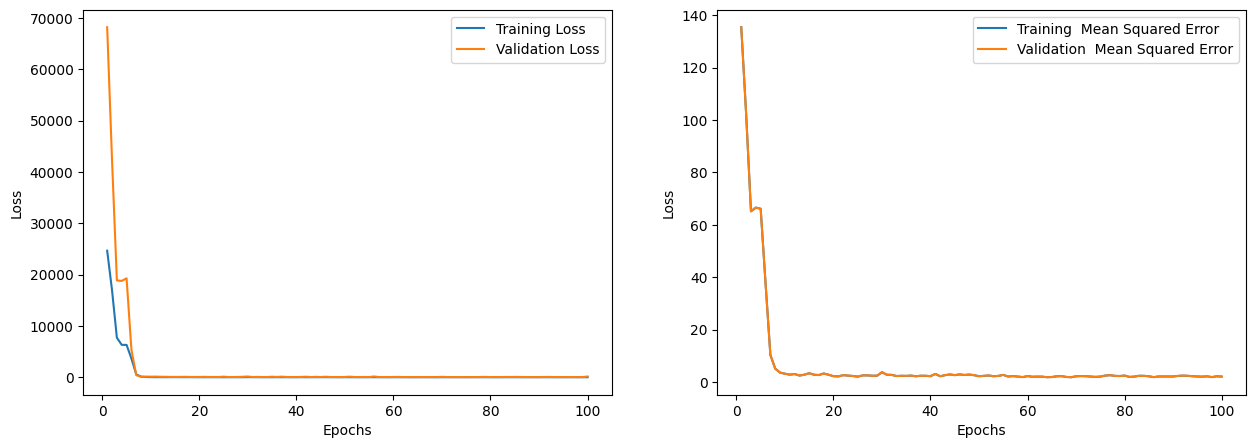

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, mse, label = "Training  Mean Squared Error")
ax2.plot(epochs, val_mse, label = "Validation  Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

48/48 [==============================] - 1s 3ms/step


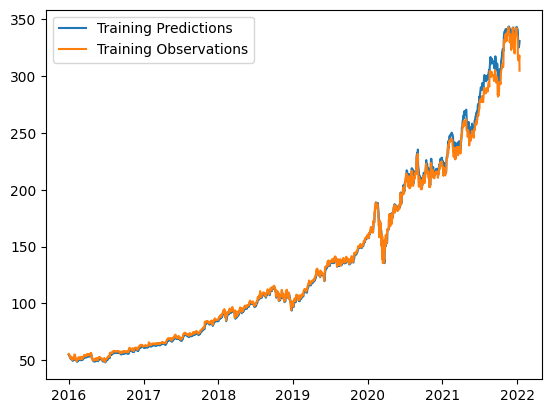

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

6/6 [==============================] - 0s 2ms/step


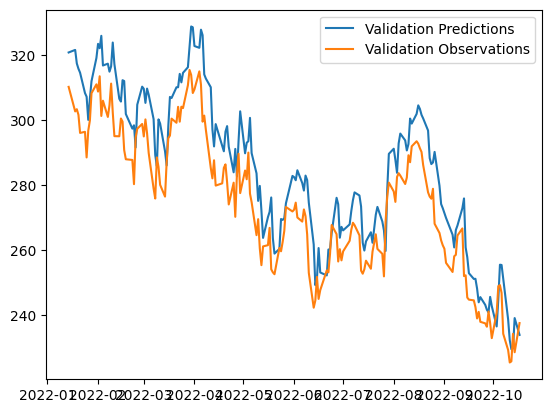

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

6/6 [==============================] - 0s 3ms/step


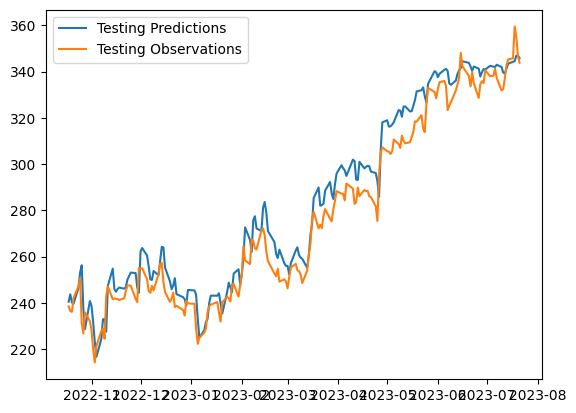

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

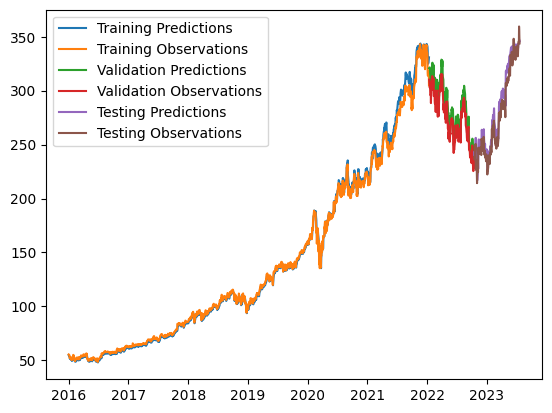

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
model.save("MSFT_mdl.h5")

In [ ]:
model2 = Sequential([layers.Input((7, 1)),
                    layers.LSTM(200, return_sequences= True),
                    layers.LSTM(200),
                    layers.Dense(200, activation='relu'),
                    layers.Dense(100, activation='relu'),
                    layers.Dense(50, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history2=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
47/47 [==============================] - 6s 31ms/step - loss: 14.1421 - mean_absolute_error: 2.6315 - val_loss: 40.8340 - val_mean_absolute_error: 5.2731
Epoch 2/100
47/47 [==============================] - 1s 12ms/step - loss: 9.7195 - mean_absolute_error: 2.1304 - val_loss: 45.8804 - val_mean_absolute_error: 5.6184
Epoch 3/100
47/47 [==============================] - 1s 12ms/step - loss: 9.0440 - mean_absolute_error: 2.0468 - val_loss: 49.4104 - val_mean_absolute_error: 5.8349
Epoch 4/100
47/47 [==============================] - 1s 12ms/step - loss: 8.9693 - mean_absolute_error: 1.9888 - val_loss: 96.6650 - val_mean_absolute_error: 8.0703
Epoch 5/100
47/47 [==============================] - 1s 14ms/step - loss: 16.0835 - mean_absolute_error: 2.9833 - val_loss: 37.6511 - val_mean_absolute_error: 5.0373
Epoch 6/100
47/47 [==============================] - 1s 19ms/step - loss: 9.2613 - mean_absolute_error: 2.0787 - val_loss: 40.3191 - val_mean_absolute_error: 5.2359
Epoch 7/

In [ ]:
loss=history2.history["loss"]
mse=history2.history["mean_absolute_error"]
val_loss = history2.history['val_loss']
val_mse = history2.history['mean_absolute_error']
epochs = range(1, len(loss) + 1)

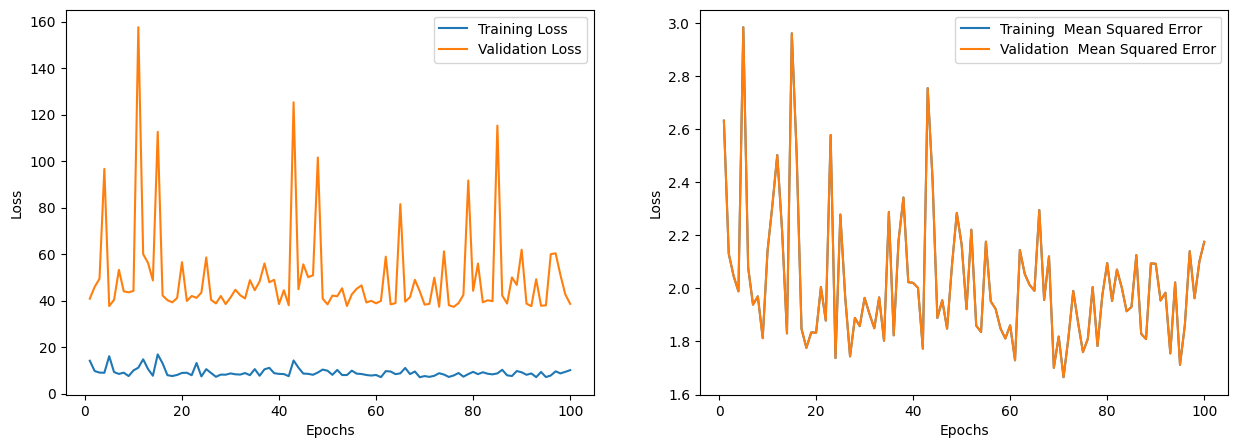

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, mse, label = "Training  Mean Squared Error")
ax2.plot(epochs, val_mse, label = "Validation  Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

6/6 [==============================] - 1s 4ms/step


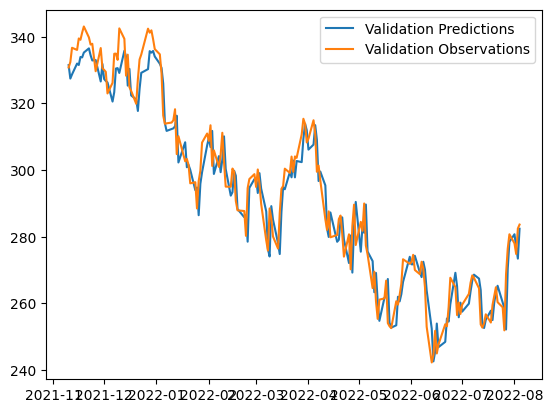

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

6/6 [==============================] - 0s 9ms/step


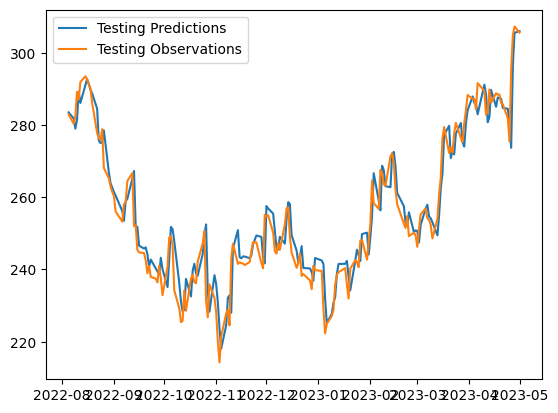

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
model3 = Sequential([layers.Input((7, 1)),
                    layers.LSTM(50, return_sequences= True),
                    layers.Dropout(0.2),
                    layers.LSTM(50, return_sequences=True),
                    layers.LSTM(50, return_sequences=False),
                    layers.Dropout(0.2),
                    layers.Dense(50, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history3=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
47/47 [==============================] - 6s 31ms/step - loss: 12.6303 - mean_absolute_error: 2.5618 - val_loss: 40.6543 - val_mean_absolute_error: 5.2042
Epoch 2/100
47/47 [==============================] - 1s 11ms/step - loss: 7.9896 - mean_absolute_error: 1.8563 - val_loss: 38.0412 - val_mean_absolute_error: 4.9405
Epoch 3/100
47/47 [==============================] - 1s 12ms/step - loss: 9.0962 - mean_absolute_error: 2.0577 - val_loss: 39.2502 - val_mean_absolute_error: 5.1427
Epoch 4/100
47/47 [==============================] - 1s 12ms/step - loss: 9.5901 - mean_absolute_error: 2.0807 - val_loss: 53.7904 - val_mean_absolute_error: 5.7133
Epoch 5/100
47/47 [==============================] - 1s 12ms/step - loss: 7.4160 - mean_absolute_error: 1.7957 - val_loss: 41.0886 - val_mean_absolute_error: 5.0786
Epoch 6/100
47/47 [==============================] - 1s 11ms/step - loss: 8.7870 - mean_absolute_error: 2.0330 - val_loss: 41.5938 - val_mean_absolute_error: 5.2981
Epoch 7/1

In [ ]:
import pandas as pd
df= pd.read_csv('/content/MSFT (4).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9410,2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900
9411,2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700
9412,2023-07-19,361.750000,362.459991,352.440002,355.079987,355.079987,39732900
9413,2023-07-20,353.570007,357.970001,345.369995,346.869995,346.869995,33778400


MSE:  903.5873650303242


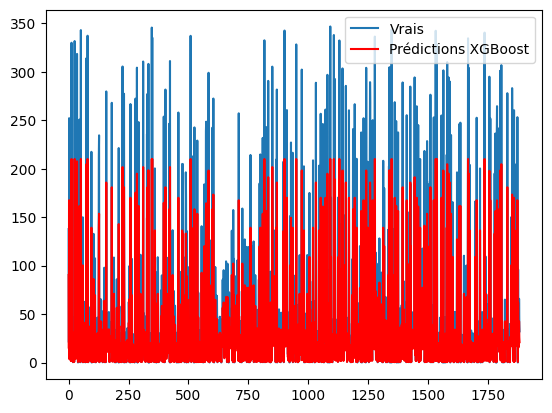

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
for i in range(1, 11):
    df[f'lag_{i}'] = df['Close'].shift(i)

X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, predictions_xgb)
print("MSE: ", mse)

# Tracer les prédictions
plt.plot(y_test.values, label='Vrais')
plt.plot(predictions_xgb, color='red', label='Prédictions XGBoost')
plt.legend()
plt.show()

In [ ]:
model_xgb.save_model("model_xgb.json")